# ORIE 4580/5580 Assignment 6

#### Students: Gundeep Singh (gs722)

### Github link: [Github link](https://github.com/gundeep15/orie_files/blob/main/HW6.ipynb)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

In [7]:
import csv
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
%matplotlib inline
import numpy.matlib
from scipy import special
from scipy import linalg

import scipy.interpolate as interp
import scipy.optimize as opt
import pandas as pd

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.
Number of arrivals between hours 0 to 12 are given by the Poisson distribution with 

$$\lambda =\int_{0}^{12} dt\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) =240$$

Probability that more than 250 arrivals occur:

In [17]:
prob = scipy.stats.poisson.cdf(250, 240)
1-prob

0.24711253205956696

___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



In [27]:
def func(t):
    return 1/56*(5*t**3 -90*t**2 +300*t + 1480 )

tmax: 1.999999999998181


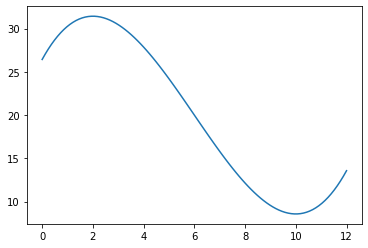

In [28]:
tarr = np.linspace(0,12,100)
plt.plot(tarr,func(tarr))
interp1 = interp.InterpolatedUnivariateSpline(tarr,func(tarr));
tmax = opt.bisect(interp1.derivative(),1,5)
print('tmax: '+ repr(tmax))

lstar = func(tmax)+0.1

In [74]:
exp = 5
probarr = np.zeros(exp)
for k in range(exp):
    repeats =500
    ncountarr = np.zeros(repeats)
    for j in range(repeats):
        ncount = 0;
        Tstarcount = 0;
        Tcount = 0;

        while Tstarcount<12:
            a = np.random.exponential(1/lstar,1)
            Tstarcount = Tstarcount+a;
            if np.random.rand()<=func(Tstarcount)/lstar:
                Tcount = Tstarcount
                ncount = ncount+1
        if Tcount>12:
            ncount = ncount-1

        ncountarr[j] = ncount
    probarr[k] = sum(ncountarr>250)/repeats   

In [76]:
mm = np.mean(probarr)
ci = 2*np.std(probarr, ddof=1)/np.sqrt(exp)
print(['Prob of more than 250 arrivals =' + repr(mm) + ' +/- ' + repr(ci)])

['Prob of more than 250 arrivals =0.24180000000000001 +/- 0.008499659435901879']


Single experiment with saving time when customers arrive:

In [ ]:
repeats =500
ncountarr = np.zeros(repeats)
tcountarr =np.zeros(12)

for j in range(repeats):
    ncount = 0;
    Tstarcount = 0;
    Tcount = [];

    while Tstarcount<12:
        a = np.random.exponential(1/lstar,1)
        Tstarcount = Tstarcount+a;
        if np.random.rand()<=func(Tstarcount)/lstar:
            Tcount.append(Tstarcount[0]);
            ncount = ncount+1
    if Tcount[-1]>12:
        ncount = ncount-1
        Tcount = Tcount[:-1]
    ncountarr[j] = ncount
    tcountarr = tcountarr + np.histogram(Tcount, bins=np.arange(0,12+1))[0] 

___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

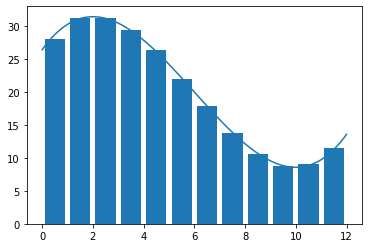

In [117]:
tarr = np.linspace(0,12,100)
plt.bar(np.arange(12)+0.5, tcountarr/repeats)
plt.plot(tarr,func(tarr))
#plt.show() 




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

In [141]:
def everysong(n):
    songlist = []
    uniquesonglist = np.unique(songlist)
    counter=0;
    while len(uniquesonglist) != n:
        songlist.append(np.random.randint(n))
        uniquesonglist = np.unique(songlist)
        counter=counter+1
    return counter
        

In [157]:
narr=np.arange(1,100)
meantotsong = np.zeros(len(narr))
sigtotsong = np.zeros(len(narr))
for n in narr:
    repeat =50
    totsongarr = np.zeros(repeat)
    for r in range(repeat):
        totsongarr[r] = everysong(n)
        
    meantotsong [n-1] =  np.mean(totsongarr)
    sigtotsong [n-1]  = 2*np.std(totsongarr, ddof=1)/np.sqrt(repeat)

In [212]:
def func_avg(N):
    sum1 = 0 ;
    for i in np.arange(1,N+1):
        sum1 = sum1 + 1/i;
    return N*sum1
y =np.zeros(len(narr))
for n in narr:
    y[n-1] = func_avg(n)


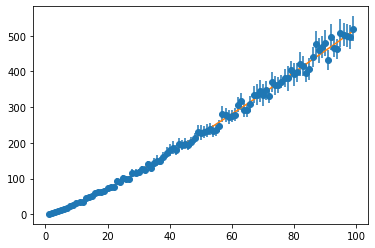

In [215]:
#plt.plot(narr,meantotsong)
plt.errorbar(narr,meantotsong,yerr = sigtotsong,fmt ='o')
plt.plot(narr,y)

## Ans.


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



In [253]:
def repeatsong(n):
    songlist = []
    uniquesonglist = np.unique(songlist)
    counter=0;
    while len(uniquesonglist) == len(songlist):
        songlist.append(np.random.randint(n))
        uniquesonglist = np.unique(songlist)
        counter=counter+1
    return counter-1
        

In [254]:
narr=np.arange(1,50)
meantotsong = np.zeros(len(narr))
sigtotsong = np.zeros(len(narr))
for n in narr:
    repeat =500
    totsongarr = np.zeros(repeat)
    for r in range(repeat):
        totsongarr[r] = repeatsong(n)
        
    meantotsong [n-1] =  np.mean(totsongarr)
    sigtotsong [n-1]  = 2*np.std(totsongarr, ddof=1)/np.sqrt(repeat)

In [225]:
# 1/N + 2*((N-1)/N*2/N) + 3*((N-1)/N*(N-2)/N*3/N) +  ... (N-1)/N*(N)

def func2_avg(N):
    sum1 = 1 ;
    for i in np.arange(2,N+1):
        sum1 = sum1 + (i-1)*i/N;
    return sum1
y =np.zeros(len(narr))
for n in narr:
    y[n-1] = func2_avg(n)


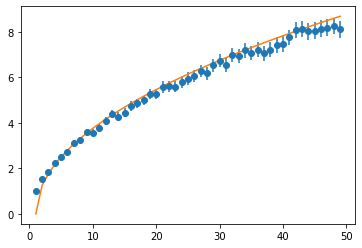

In [261]:
#plt.plot(narr,meantotsong)
plt.errorbar(narr,meantotsong,yerr = sigtotsong,fmt ='o')
plt.plot(narr,np.sqrt(np.pi*(narr-1)/2))

___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

In [279]:
def lastsong(n, start):
    i=start;
    songlist = [i]
    uniquesonglist = np.unique(songlist)
    counter=0;
    while len(uniquesonglist) != n:
    #for aaa in range(100):
        r = np.random.rand()
        if r<0.5:
            i = (i+1) % n
        else: 
            i = (i-1) % n
        songlist.append(i)
        uniquesonglist = np.unique(songlist)
    return songlist[-1]

In [288]:
repeats=1000;
lasthist = np.zeros(repeats)
for i in range(repeats):
    lasthist[i] = lastsong(20,1)   

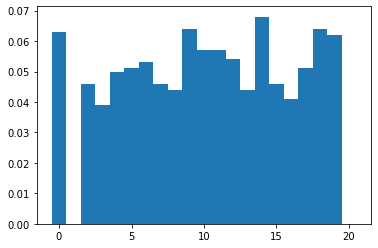

In [290]:
plt.hist(lasthist, bins = np.arange(0,22)-0.5, density =True);

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

In [316]:
def playerwin (a,b):
    while (a>0 and b>0):
        r = np.random.rand()
        if r<0.5:
            a = a-1
            b = b+1
        else:
            b=b-1
            a=a+1
    if a==0:
        rval = 0 # B wins
    elif b==0:
        rval = 1 # A wins
    return rval        

Analytical:

probability that A wins = a/(a+b)

In [338]:
a=10
b=5
repeat=1000
rind = np.zeros(repeat)
for r in range(repeat):
    rind[r] = playerwin (a,b)

In [339]:
a/(a+b)

0.6666666666666666

In [340]:
sum(rind)/repeat

0.661

___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

In [379]:
def gameduration (a,b):
    counter=0
    while (a>0 and b>0):
        r = np.random.rand()
        if r<0.5:
            a = a-1
            b = b+1
        else:
            b=b-1
            a=a+1
        counter=counter+1    

    return counter    

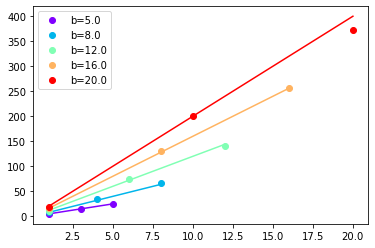

In [522]:
spacing =5
#color = plt.cm.rainbow(np.linspace(0, 1, spacing))
color = iter(plt.cm.rainbow(np.linspace(0, 1, spacing)))
barr = np.floor(np.linspace(5,20,spacing))
for b in barr:
    col = next(color)
    aarr = np.floor(np.linspace(1,b,3))
    repeat=1000
    garr = np.zeros([len(aarr),repeat])
    c = 0;
    for a in aarr:
        for r in range(repeat):
            garr[c,r] = gameduration (a,b)
        c=c+1    
    plt.plot(aarr, np.mean(garr,axis=1), 'o', c=col,label = 'b='+ repr(b))
    plt.plot(aarr, aarr*b, c=col)
plt.legend()   


In [502]:
repeat=1000
gsingarr = np.zeros(repeat)

for r in range(repeat):
    gsingarr[r] = gameduration (2,3)
    
np.mean(gsingarr)    

5.805

In [500]:
def gamblepredab(a,b):
    return (a*b)  

In [503]:
gamblepredab (1,3)

3

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [432]:
def ithfriend():
    t0= np.random.exponential(1/0.5,1)
    tcurr = np.random.exponential(1/0.5,1)
    counter=1;
    while tcurr>t0:
        tcurr= np.random.exponential(1/0.5,1)
        counter = counter+1
    return counter 

In [450]:
repeat =100;
ifarr = np.zeros(repeat)
for r in range(repeat):
    ifarr[r] = ithfriend()

In [451]:
mm = np.mean(ifarr) 
ci =2*np.std(ifarr, ddof=1)/np.sqrt(repeat)

print('Mean number of friends to be surveyed = ' + repr(mm) + ' +/- ' + repr(ci) )

Mean number of friends to be surveyed = 7.73 +/- 6.9128400513651105


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


In [523]:
repeatarr = np.concatenate((np.array([100]),np.arange(500,10001,500)))
mmarr = np.zeros(len(repeatarr))
ciarr = np.zeros(len(repeatarr))
c=0;
for repeat in repeatarr:
    ifarr = np.zeros(repeat)
    for r in range(repeat):
        ifarr[r] = ithfriend()
    mmarr[c] = np.mean(ifarr) 
    ciarr[c] =2*np.std(ifarr, ddof=1)/np.sqrt(repeat)
    c=c+1;

<ErrorbarContainer object of 3 artists>

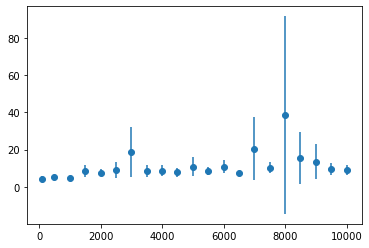

In [524]:
plt.errorbar(repeatarr,mmarr,yerr = ciarr,fmt ='o')


___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans. 

PDF: $f(x) =2 e^{-2x}$

CDF: $F(x) =1- e^{-2x}$

Say our initial exponential variable is $x_0$, probability that the next exponential variable is greater than $x_0$,

$p= e^{-2x_0}$

The expected value of the number of friends it takes to find someone with $x>x_0$:

$E(p) = p + 2(1-p)p + 3(1-p)^2p + ... $

As the above sum is diverging for p>0, we can say that the expected value is infinite!